In [56]:
import numpy as np
import os
import pandas as pd
import cv2

In [57]:
img_path = 'flowers/'
img_types = os.listdir(img_path)
images = []
labels = []
paths = []
im_size = 224
for items in img_types:
    samples = os.listdir(img_path+str(items))
    for files in samples:
        path = img_path+str(items)+'/'+str(files)
        #print(path)
        paths.append((items,path))
        img = cv2.imread(path)
        img = cv2.resize(img,(im_size,im_size))
        images.append(img)
        labels.append(items)


pd_dataframe = pd.DataFrame(data=paths,columns=['labels','paths'])

In [58]:
pd_dataframe.head()

,labels,paths
0,daisy,flowers/daisy/33843240613_0b736f9896_n_jpg.rf....
1,daisy,flowers/daisy/14600779226_7bbc288d40_m_jpg.rf....
2,daisy,flowers/daisy/34661399476_9ea7e2fd53_n_jpg.rf....
3,daisy,flowers/daisy/4753134939_8e87649db6_jpg.rf.31a...
4,daisy,flowers/daisy/5110109540_beed4ed162_m_jpg.rf.0...


In [59]:
len(pd_dataframe)

1821

In [60]:
images = np.array(images)
images = images.astype('float32')/255
print(images.shape)

(1821, 224, 224, 3)


In [61]:
print(len(img_types))

2


In [79]:
pd_dataframe['labels'].value_counts()

labels
dandelion    1052
daisy         769
Name: count, dtype: int64

In [62]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_enc = LabelEncoder()
y = label_enc.fit_transform(labels)
y = y.reshape(-1,1)

one_enc = OneHotEncoder()
y = one_enc.fit_transform(y)
y = y.toarray()
#y = np.array(y)
print(y.shape)

(1821, 2)


In [63]:
print(y[1])
print(labels[1])

[1. 0.]
daisy


In [64]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

X,Y = shuffle(images,y,random_state=2)
train_x,test_x,train_y,test_y = train_test_split(images,y,test_size=0.05,random_state=400)

In [65]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1729, 224, 224, 3)
(1729, 2)
(92, 224, 224, 3)
(92, 2)


In [68]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

num_classes = len(img_types)
IMG_SIZE = 224
size = (IMG_SIZE,IMG_SIZE)

inputs = layers.Input(shape=(IMG_SIZE,IMG_SIZE,3))
outputs = EfficientNetB0(include_top=True,weights=None,classes=num_classes)(inputs)

In [69]:
model = tf.keras.Model(inputs,outputs)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ efficientnetb0 (Functional)     │ (None, 2)                 │  4,052,133 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 4,052,133 (15.46 MB)

 Trainable params: 4,010,110 (15.30 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [1]:
%%timeit -n1 -r1
hist = model.fit(train_x,train_y,epochs=30,verbose=2)

NameError: name 'model' is not defined

In [71]:
preds = model.evaluate(test_x,test_y)
print("Loss = "+str(preds[0]))
print("Accuracy = "+str(preds[1]))

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.8505 - loss: 1.2719
Loss = 1.4451392889022827
Accuracy = 0.8260869383811951


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


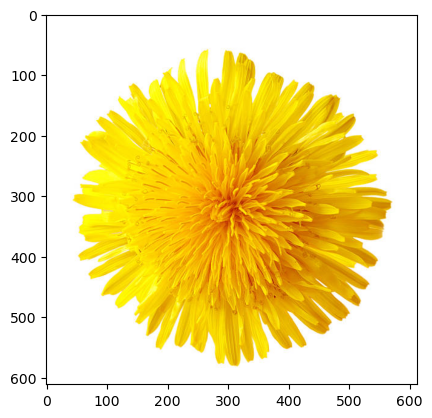

In [80]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'daisy.jpg'
img = cv2.imread(img_path)
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imshow(img1)

img = cv2.resize(img,size)
x = np.expand_dims(img,axis=0)
x = preprocess_input(x)
pred = model.predict(x)


In [81]:
pred

array([[1., 0.]], dtype=float32)

In [74]:
print(y[1])
print(labels[1])
#print(pd_dataframe[pd_dataframe['labels']=="Audi"])

[1. 0.]
daisy
